# **Detect LLM-Generated Arabic Text**

In [ ]:
!pip install nltk scikit-learn arabic-reshaper python-bidi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/train_set.csv')

In [ ]:
data.head()

,text_id,text,generated
0,9519,380 أرض السوار\nوكيف ظل البحارة يرفعون الأحمال...,0
1,6247,- وقال كَيةِ لحسان'» : قل فوالله لقولك أشدّ عل...,0
2,3065,في غابة نائية عميقة، حيث تسكن الأشجار الضخمة و...,1
3,652,"في صميم قرية ""العُتمة""، حيث تتجذر أشجار الزيتو...",1
4,3447,\nفي قلب مدينة مزدحمة لم تنم يومًا، حيث تتشابك...,1


## 1. Data Visualization

In [ ]:
import re

# Function to remove diacritics
def remove_diacritics(text):
    if not isinstance(text, str):
        return text  # Return as-is if not a string
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    return re.sub(arabic_diacritics, '', text)
# Remove diacritics from the 'text' column
data['text'] = data['text'].apply(remove_diacritics)

In [ ]:
data.head()

,text_id,text,generated
0,9519,380 أرض السوار\nوكيف ظل البحارة يرفعون الأحمال...,0
1,6247,- وقال كية لحسان'» : قل فوالله لقولك أشد عليهم...,0
2,3065,في غابة نائية عميقة، حيث تسكن الأشجار الضخمة و...,1
3,652,"في صميم قرية ""العتمة""، حيث تتجذر أشجار الزيتون...",1
4,3447,\nفي قلب مدينة مزدحمة لم تنم يوما، حيث تتشابك ...,1


<ipython-input-63-5eecb24f514b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='generated', palette='Set2')


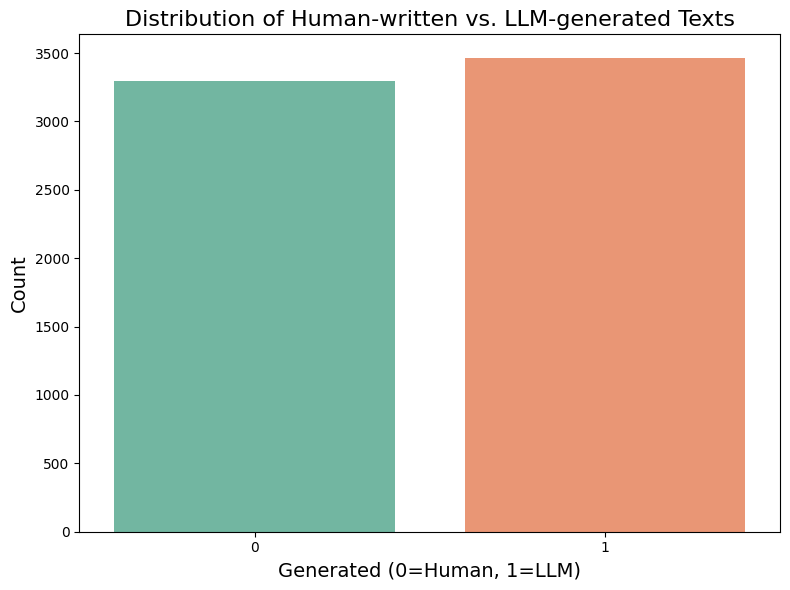

In [ ]:
# Plotting the distribution of the 'generated' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='generated', palette='Set2')

# Adding title and labels
plt.title('Distribution of Human-written vs. LLM-generated Texts', fontsize=16)
plt.xlabel('Generated (0=Human, 1=LLM)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Function to preprocess text and get word frequencies
def get_top_words(data, label, top_n=10):
    # Filter data based on label (0 for human, 1 for LLM)
    text_data = " ".join(data[data['generated'] == label]['text'])

    # Reshape and tokenize Arabic text
    reshaped_text = arabic_reshaper.reshape(text_data)
    bidi_text = get_display(reshaped_text)
    words = bidi_text.split()

    # Count word frequencies
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

# Get top 10 words for human-written and LLM-generated texts
top_human_words = get_top_words(data, label=0, top_n=20)
top_llm_words = get_top_words(data, label=1, top_n=20)

# Convert to DataFrame for plotting
human_df = pd.DataFrame(top_human_words, columns=['Word', 'Frequency'])
human_df['Source'] = 'Human'

llm_df = pd.DataFrame(top_llm_words, columns=['Word', 'Frequency'])
llm_df['Source'] = 'LLM'

# Combine data
combined_df = pd.concat([human_df, llm_df])




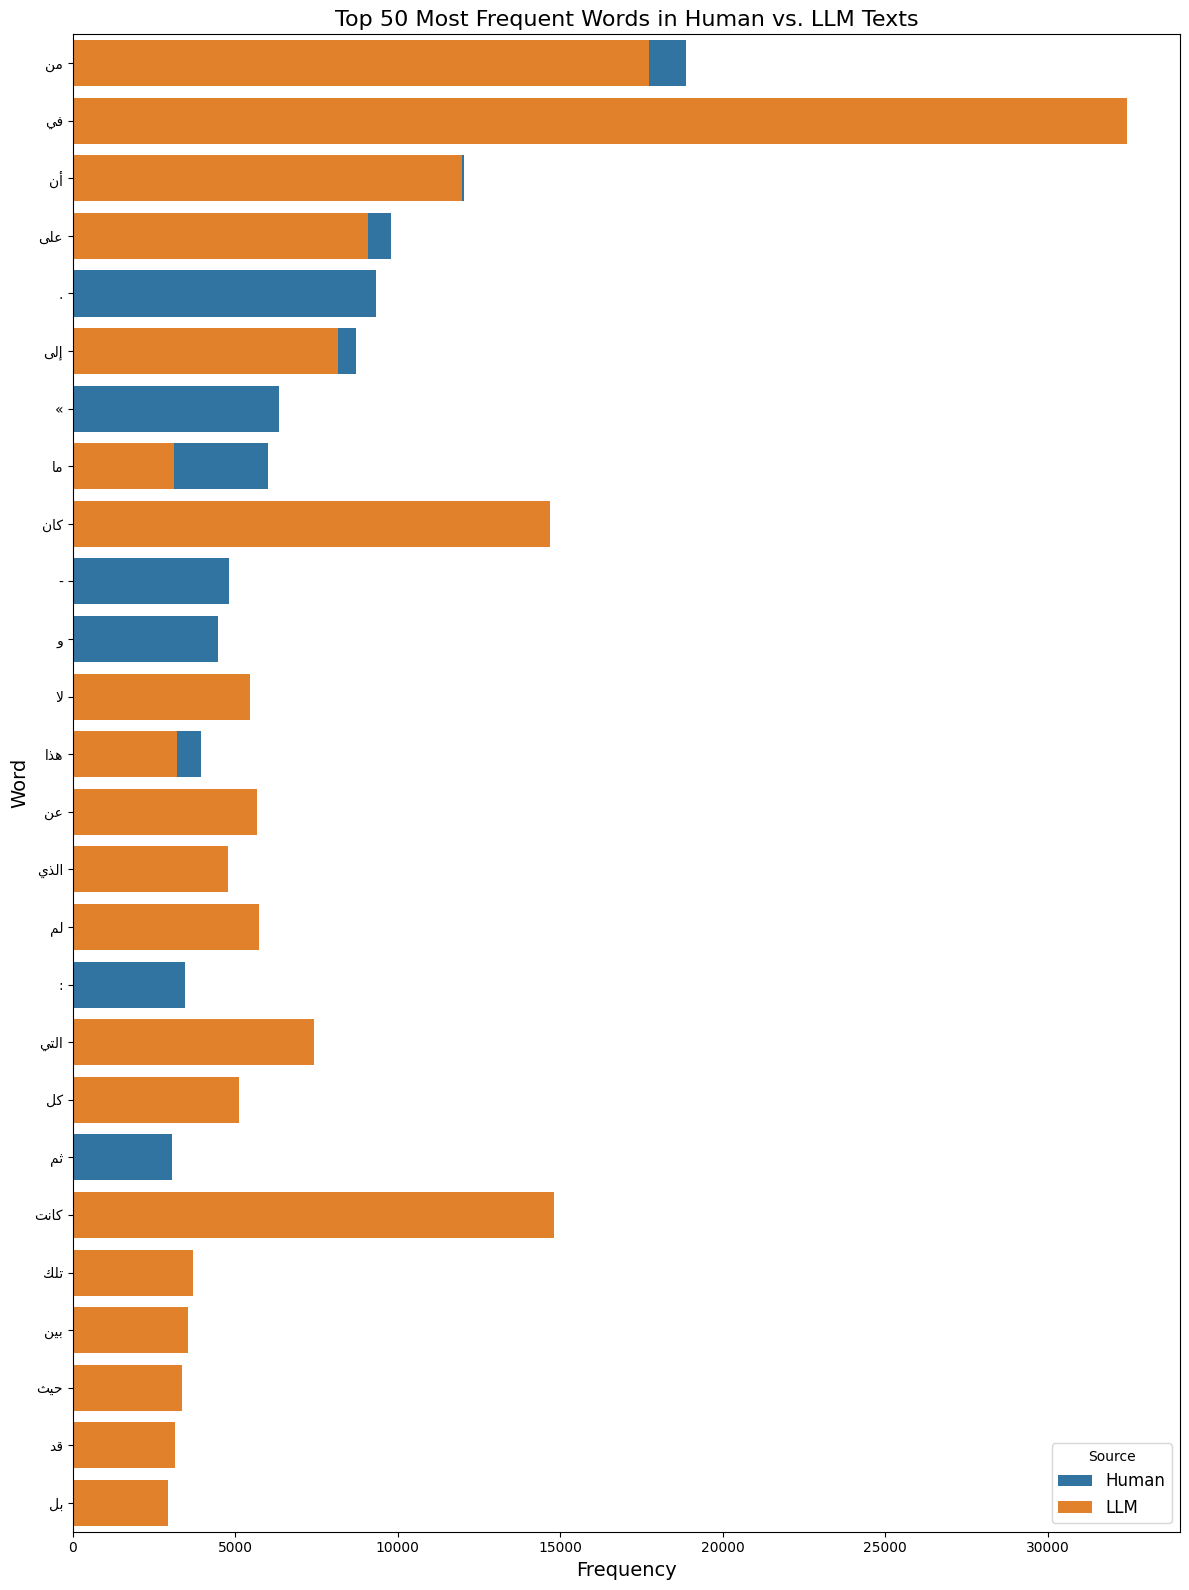

In [ ]:
# Plotting
plt.figure(figsize=(12, 16))
sns.barplot(data=combined_df, x='Frequency', y='Word', hue='Source', dodge=False)
plt.title('Top 50 Most Frequent Words in Human vs. LLM Texts', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.tight_layout()
plt.show()


## 2. Data Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from arabic_reshaper import reshape
from bidi.algorithm import get_display
nltk.download('stopwords')

# Tokenization + Remove stopwords
def preprocess_text(text):

    # Step 1: Tokenize text (split by spaces)
    tokens = text.split()

    # Step 2: Remove stopwords (Arabic stopwords)
    stop_words = set(stopwords.words('arabic'))
    tokens = [word for word in tokens if word not in stop_words]

    # Step 3: Reshape and fix bidi (important for Arabic display)
    reshaped_text = reshape(" ".join(tokens))
    bidi_text = get_display(reshaped_text)

    return bidi_text


# Just tokenization
def preprocess_text1(text):
    # Step 1: Reshape and fix bidi (important for Arabic)
    reshaped_text = reshape(text)
    bidi_text = get_display(reshaped_text)

    # Step 3: Tokenize text (split by spaces)
    tokens = bidi_text.split()
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = data.copy()
# Apply preprocessing to all text data
df['cleaned_text'] = df['text'].apply(preprocess_text)
df['cleaned_text1'] = df['text'].apply(preprocess_text1)



In [ ]:
df.head()

,text_id,text,generated,cleaned_text,cleaned_text1
0,9519,380 أرض السوار\nوكيف ظل البحارة يرفعون الأحمال...,0,!ﻲﻟﻭﺎﺧ ﻪﻔﺘﻛ ﻰﻠﻋﻭ ﻖﻳﺮﺑﺇ ﻩﺪﻳﺎﺑ :ﻡﻮﻳ ﺪﻓ ﻪﻔﻳﺎﺷ ﻲﻧﺄ...,ﺭﺍﻮﺴﻟﺍ ﺽﺭﺃ 380 ﺎﻨﻴﻔﺳ ﻦﻣ ﺮﺒﻛﺃ ﺔﻨﻴﻔﺳ ﻰﻟﺇ ﻝﺎﻘﺛﻷﺍﻭ...
1,6247,- وقال كية لحسان'» : قل فوالله لقولك أشد عليهم...,0,ﻞﺘﺘﻣ ﺐﻠﻗ ﺭﺎﺸﻋﺃ ﻚﻴﻤﻬﺴﺑ ﻲﺑﺮﻀﺘﻟ ﻙﺎﻨﻴﻋ ﺖﻓﺭﺫ : ﺖﻴﺒﻟ...,ﻞﺘﺘﻣ ﺐﻠﻗ ﺭﺎﺸﻋﺃ ﻲﻓ ﻚﻴﻤﻬﺴﺑ ﻲﺑﺮﻀﺘﻟ ﺍﺫﺇ ﻙﺎﻨﻴﻋ ﺖﻓﺭﺫ...
2,3065,في غابة نائية عميقة، حيث تسكن الأشجار الضخمة و...,1,.ﻪﺋﺎﻄﺧﺄﺑ ﻑﺮﺘﻌﻳ ﻥﺃﻭ ،ﻪﻴﺿﺎﻣ ﺢﻟﺎﺼﺘﻳ ،ﺝﺮﺨﻳ ﺩﺍﺭﺃ ﻪﻧ...,.ﻪﺋﺎﻄﺧﺄﺑ ﻑﺮﺘﻌﻳ ﻥﺃﻭ ،ﻪﻴﺿﺎﻣ ﻊﻣ ﺢﻟﺎﺼﺘﻳ ﻥﺃ ﻪﻴﻠﻋ ،ﺝ...
3,652,"في صميم قرية ""العتمة""، حيث تتجذر أشجار الزيتون...",1,.ﻲﺗﺄﻳ ﺎﺼﻠﺨﻣ ﺮﻈﺘﻨﺗ ،ﺓﺎﻧﺎﻌﻤﻟﺍﻭ ﺡﺪﻜﻟﺍ ﺔﻏﺮﻔﻣ ﺓﺮﺋﺍﺩ...,.ﻲﺗﺄﻳ ﻦﻟ ﺎﺼﻠﺨﻣ ﺮﻈﺘﻨﺗ ،ﺓﺎﻧﺎﻌﻤﻟﺍﻭ ﺡﺪﻜﻟﺍ ﻦﻣ ﺔﻏﺮﻔﻣ...
4,3447,\nفي قلب مدينة مزدحمة لم تنم يوما، حيث تتشابك ...,1,.ﻝﻼﻇﻭ ﺭﻮﻧ ﻑﺮﺣﺄﺑ ﺐﺘﻜﻳ ﺮﻴﺼﻤﻟﺍ ﺚﻴﺣﻭ ،ﺔﻨﻳﺪﻤﻟﺍ ﺔﻗﺯﺃ...,.ﺓﺪﺣﺍﻭ ﺔﻈﺤﻟ ﻲﻓ ﺮﻄﺨﻟﺍﻭ ﺮﺤﺴﻟﺎﺑ ﺔﺌﻴﻠﻣ ﺔﺼﻗ ﻰﻟﺇ ﻪﺗﺎ...


In [ ]:
df.to_csv("/content/drive/MyDrive/Dataset/preprocessed_text.csv", index=False, encoding='utf-8-sig')

In [ ]:
newdata = pd.read_csv('/content/drive/MyDrive/Dataset/preprocessed_text.csv')

In [ ]:
newdata.head()

,text_id,text,generated,cleaned_text,cleaned_text1
0,9519,380 أرض السوار\nوكيف ظل البحارة يرفعون الأحمال...,0,!ﻲﻟﻭﺎﺧ ﻪﻔﺘﻛ ﻰﻠﻋﻭ ﻖﻳﺮﺑﺇ ﻩﺪﻳﺎﺑ :ﻡﻮﻳ ﺪﻓ ﻪﻔﻳﺎﺷ ﻲﻧﺄ...,ﺭﺍﻮﺴﻟﺍ ﺽﺭﺃ 380 ﺎﻨﻴﻔﺳ ﻦﻣ ﺮﺒﻛﺃ ﺔﻨﻴﻔﺳ ﻰﻟﺇ ﻝﺎﻘﺛﻷﺍﻭ...
1,6247,- وقال كية لحسان'» : قل فوالله لقولك أشد عليهم...,0,ﻞﺘﺘﻣ ﺐﻠﻗ ﺭﺎﺸﻋﺃ ﻚﻴﻤﻬﺴﺑ ﻲﺑﺮﻀﺘﻟ ﻙﺎﻨﻴﻋ ﺖﻓﺭﺫ : ﺖﻴﺒﻟ...,ﻞﺘﺘﻣ ﺐﻠﻗ ﺭﺎﺸﻋﺃ ﻲﻓ ﻚﻴﻤﻬﺴﺑ ﻲﺑﺮﻀﺘﻟ ﺍﺫﺇ ﻙﺎﻨﻴﻋ ﺖﻓﺭﺫ...
2,3065,في غابة نائية عميقة، حيث تسكن الأشجار الضخمة و...,1,.ﻪﺋﺎﻄﺧﺄﺑ ﻑﺮﺘﻌﻳ ﻥﺃﻭ ،ﻪﻴﺿﺎﻣ ﺢﻟﺎﺼﺘﻳ ،ﺝﺮﺨﻳ ﺩﺍﺭﺃ ﻪﻧ...,.ﻪﺋﺎﻄﺧﺄﺑ ﻑﺮﺘﻌﻳ ﻥﺃﻭ ،ﻪﻴﺿﺎﻣ ﻊﻣ ﺢﻟﺎﺼﺘﻳ ﻥﺃ ﻪﻴﻠﻋ ،ﺝ...
3,652,"في صميم قرية ""العتمة""، حيث تتجذر أشجار الزيتون...",1,.ﻲﺗﺄﻳ ﺎﺼﻠﺨﻣ ﺮﻈﺘﻨﺗ ،ﺓﺎﻧﺎﻌﻤﻟﺍﻭ ﺡﺪﻜﻟﺍ ﺔﻏﺮﻔﻣ ﺓﺮﺋﺍﺩ...,.ﻲﺗﺄﻳ ﻦﻟ ﺎﺼﻠﺨﻣ ﺮﻈﺘﻨﺗ ،ﺓﺎﻧﺎﻌﻤﻟﺍﻭ ﺡﺪﻜﻟﺍ ﻦﻣ ﺔﻏﺮﻔﻣ...
4,3447,\nفي قلب مدينة مزدحمة لم تنم يوما، حيث تتشابك ...,1,.ﻝﻼﻇﻭ ﺭﻮﻧ ﻑﺮﺣﺄﺑ ﺐﺘﻜﻳ ﺮﻴﺼﻤﻟﺍ ﺚﻴﺣﻭ ،ﺔﻨﻳﺪﻤﻟﺍ ﺔﻗﺯﺃ...,.ﺓﺪﺣﺍﻭ ﺔﻈﺤﻟ ﻲﻓ ﺮﻄﺨﻟﺍﻭ ﺮﺤﺴﻟﺎﺑ ﺔﺌﻴﻠﻣ ﺔﺼﻗ ﻰﻟﺇ ﻪﺗﺎ...


## 3. Embeddings

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Initialize the tokenizer and model for multilingual BERT (which supports Arabic)
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

In [ ]:
# Function to get multilingual BERT embeddings
def get_bert_embeddings(texts):
    embeddings = []

    for text in texts:
        # Tokenize and get input IDs for the model
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

        # Forward pass through the model to get embeddings
        with torch.no_grad():
            outputs = model(**inputs)

        # Use the embeddings of the [CLS] token (first token in the sequence)
        cls_embedding = outputs.last_hidden_state[0, 0, :].numpy()  # shape (768,)
        embeddings.append(cls_embedding)

    return np.array(embeddings)


In [ ]:

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features_cleaned_text = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()
tfidf_features_cleaned_text1 = tfidf_vectorizer.fit_transform(df['cleaned_text1']).toarray()

# Get multilingual BERT embeddings for both cleaned_text and cleaned_text1
bert_embeddings_cleaned_text = get_bert_embeddings(df['cleaned_text'])
bert_embeddings_cleaned_text1 = get_bert_embeddings(df['cleaned_text1'])

# Combine TF-IDF with multilingual BERT embeddings for both columns
combined_features_cleaned_text = np.concatenate((tfidf_features_cleaned_text, bert_embeddings_cleaned_text), axis=1)
combined_features_cleaned_text1 = np.concatenate((tfidf_features_cleaned_text1, bert_embeddings_cleaned_text1), axis=1)



In [ ]:
# Store the combined features in the DataFrame
df['combined_features_cleaned_text'] = list(combined_features_cleaned_text)
df['combined_features_cleaned_text1'] = list(combined_features_cleaned_text1)

# Save the DataFrame with the combined features
df.to_csv("/content/drive/MyDrive/Dataset/combined_features_text.csv", index=False)

print("Combined features saved successfully as 'combined_features_text.csv'")

Combined features saved successfully as 'combined_features_text.csv'


In [ ]:
# Save the DataFrame as a binary file
df.to_pickle("/content/drive/MyDrive/Dataset/combined_features_text.pkl")

# Load the DataFrame later
# test = pd.read_pickle("/content/drive/MyDrive/Dataset/Train_test.pkl")


In [ ]:
len(df['combined_features_cleaned_text'][0])

5768

## 4. Training

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/combined_features_text.csv')

In [ ]:
train.head()

,text_id,text,generated,cleaned_text,cleaned_text1,combined_features_cleaned_text,combined_features_cleaned_text1
0,9519,380 أرض السوار\nوكيف ظل البحارة يرفعون الأحمال...,0,!ﻲﻟﻭﺎﺧ ﻪﻔﺘﻛ ﻰﻠﻋﻭ ﻖﻳﺮﺑﺇ ﻩﺪﻳﺎﺑ :ﻡﻮﻳ ﺪﻓ ﻪﻔﻳﺎﺷ ﻲﻧﺄ...,ﺭﺍﻮﺴﻟﺍ ﺽﺭﺃ 380 ﺎﻨﻴﻔﺳ ﻦﻣ ﺮﺒﻛﺃ ﺔﻨﻴﻔﺳ ﻰﻟﺇ ﻝﺎﻘﺛﻷﺍﻭ...,[ 0. 0. 0. ... 0.07...,[ 0. 0. 0. ... 0.11...
1,6247,- وقال كية لحسان'» : قل فوالله لقولك أشد عليهم...,0,ﻞﺘﺘﻣ ﺐﻠﻗ ﺭﺎﺸﻋﺃ ﻚﻴﻤﻬﺴﺑ ﻲﺑﺮﻀﺘﻟ ﻙﺎﻨﻴﻋ ﺖﻓﺭﺫ : ﺖﻴﺒﻟ...,ﻞﺘﺘﻣ ﺐﻠﻗ ﺭﺎﺸﻋﺃ ﻲﻓ ﻚﻴﻤﻬﺴﺑ ﻲﺑﺮﻀﺘﻟ ﺍﺫﺇ ﻙﺎﻨﻴﻋ ﺖﻓﺭﺫ...,[ 0. 0. 0. ... 0.04...,[ 0. 0. 0. ... 0.10...
2,3065,في غابة نائية عميقة، حيث تسكن الأشجار الضخمة و...,1,.ﻪﺋﺎﻄﺧﺄﺑ ﻑﺮﺘﻌﻳ ﻥﺃﻭ ،ﻪﻴﺿﺎﻣ ﺢﻟﺎﺼﺘﻳ ،ﺝﺮﺨﻳ ﺩﺍﺭﺃ ﻪﻧ...,.ﻪﺋﺎﻄﺧﺄﺑ ﻑﺮﺘﻌﻳ ﻥﺃﻭ ،ﻪﻴﺿﺎﻣ ﻊﻣ ﺢﻟﺎﺼﺘﻳ ﻥﺃ ﻪﻴﻠﻋ ،ﺝ...,[ 0. 0. 0. ... 0.05...,[ 0. 0. 0. ... 0.09...
3,652,"في صميم قرية ""العتمة""، حيث تتجذر أشجار الزيتون...",1,.ﻲﺗﺄﻳ ﺎﺼﻠﺨﻣ ﺮﻈﺘﻨﺗ ،ﺓﺎﻧﺎﻌﻤﻟﺍﻭ ﺡﺪﻜﻟﺍ ﺔﻏﺮﻔﻣ ﺓﺮﺋﺍﺩ...,.ﻲﺗﺄﻳ ﻦﻟ ﺎﺼﻠﺨﻣ ﺮﻈﺘﻨﺗ ،ﺓﺎﻧﺎﻌﻤﻟﺍﻭ ﺡﺪﻜﻟﺍ ﻦﻣ ﺔﻏﺮﻔﻣ...,[ 0. 0. 0. ... 0.05...,[ 0. 0. 0. ... 0.06...
4,3447,\nفي قلب مدينة مزدحمة لم تنم يوما، حيث تتشابك ...,1,.ﻝﻼﻇﻭ ﺭﻮﻧ ﻑﺮﺣﺄﺑ ﺐﺘﻜﻳ ﺮﻴﺼﻤﻟﺍ ﺚﻴﺣﻭ ،ﺔﻨﻳﺪﻤﻟﺍ ﺔﻗﺯﺃ...,.ﺓﺪﺣﺍﻭ ﺔﻈﺤﻟ ﻲﻓ ﺮﻄﺨﻟﺍﻭ ﺮﺤﺴﻟﺎﺑ ﺔﺌﻴﻠﻣ ﺔﺼﻗ ﻰﻟﺇ ﻪﺗﺎ...,[ 0. 0. 0. ... 0.04...,[ 0. 0. 0. ... 0.07...


In [ ]:
devdata = pd.read_csv('/content/drive/MyDrive/Dataset/dev_set.csv')

In [ ]:
devdata.shape

(1450, 3)

In [ ]:
devdata['text'] = devdata['text'].apply(remove_diacritics)

In [ ]:
df = devdata.copy()
# Apply preprocessing to all text data
df['cleaned_text'] = df['text'].apply(preprocess_text)
df['cleaned_text1'] = df['text'].apply(preprocess_text1)

In [ ]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features_cleaned_text = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()
tfidf_features_cleaned_text1 = tfidf_vectorizer.fit_transform(df['cleaned_text1']).toarray()

# Get multilingual BERT embeddings for both cleaned_text and cleaned_text1
bert_embeddings_cleaned_text = get_bert_embeddings(df['cleaned_text'])
bert_embeddings_cleaned_text1 = get_bert_embeddings(df['cleaned_text1'])

# Combine TF-IDF with multilingual BERT embeddings for both columns
combined_features_cleaned_text = np.concatenate((tfidf_features_cleaned_text, bert_embeddings_cleaned_text), axis=1)
combined_features_cleaned_text1 = np.concatenate((tfidf_features_cleaned_text1, bert_embeddings_cleaned_text1), axis=1)

# Store the combined features in the DataFrame
df['combined_features_cleaned_text'] = list(combined_features_cleaned_text)
df['combined_features_cleaned_text1'] = list(combined_features_cleaned_text1)

# Save the DataFrame with the combined features
df.to_pickle("/content/drive/MyDrive/Dataset/combined_features_dev_set.pkl")

print("Combined features saved successfully as 'combined_features_dev_set'")

Combined features saved successfully as 'combined_features_dev_set'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
# Load the dataset
train = pd.read_pickle("/content/drive/MyDrive/Dataset/combined_features_text.pkl")
val = pd.read_pickle("/content/drive/MyDrive/Dataset/combined_features_dev_set.pkl")



In [ ]:
train['combined_features_cleaned_text'][0]

array([ 0.        ,  0.        ,  0.        , ...,  0.07843874,
       -0.05448157, -0.06136263])

In [ ]:
# Extract features and target
X = np.array(train['combined_features_cleaned_text'].tolist())  # Use combined features
y = train['generated']  # Target: 0 (human) or 1 (generated)

# Split into training and test sets
X_train = np.array(train['combined_features_cleaned_text'].tolist())
X_test = np.array(val['combined_features_cleaned_text'].tolist())
y_train = np.array(train['generated'] .tolist())
y_test = np.array(val['generated'] .tolist())

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set using ROC-AUC
y_test_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC on test set: {roc_auc}")


ROC-AUC on test set: 0.9944698372932853


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import numpy as np



# Define and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(512,256,128), max_iter=1000, random_state=42, activation='relu', solver='adam')
mlp_model.fit(X_train, y_train)

# Evaluate the model on the test set using ROC-AUC
y_test_proba = mlp_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC on test set: {roc_auc}")
# ROC-AUC on test set: 0.9994577812759631 (128, 256, 64)
# ROC-AUC on test set: 0.9994621540076085 (128, 256)
# ROC-AUC on test set: 0.999490576763304 (10,5) =====> 1
# ROC-AUC on test set: 0.9994862040316586 (30,20)




ROC-AUC on test set: 0.9931905707394427


In [ ]:
X.shape[1]

5768

In [ ]:
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import numpy as np

# Split into training and validation sets
X_val = X_test
y_val = y_test
# Define the MLP model
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Input layer with feature size (5768)
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate for better convergence
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.AUC(name='roc_auc')]
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Increased epochs for improved training
    batch_size=64,  # Larger batch size for more stable gradient updates
    verbose=1
)

# Evaluate the model on the validation set
y_val_proba = model.predict(X_val).ravel()  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC-AUC on validation set: {roc_auc}")

# ROC-AUC on validation set: 0.9869941233692683

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 9.9596 - roc_auc: 0.9727 - val_loss: 4.3133 - val_roc_auc: 0.9940
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 3.0779 - roc_auc: 0.9995 - val_loss: 2.2227 - val_roc_auc: 0.9822
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 1.5232 - roc_auc: 0.9984 - val_loss: 2.4767 - val_roc_auc: 0.9945
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 0.8594 - roc_auc: 0.9991 - val_loss: 1.2837 - val_roc_auc: 0.9913
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.5535 - roc_auc: 0.9996 - val_loss: 0.8115 - val_roc_auc: 0.9880
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.3674 - roc_auc: 0.9990 - val_loss: 2.1342 - val_roc_auc: 0.9883
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 0.3264 - roc_auc: 0.9978 - val_loss: 1.7475 - val_roc_auc: 0.9850
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.2516 - roc_auc: 0.9995 - val_loss: 

In [ ]:

# Generate predictions for the submission file
test_data = pd.read_csv("/path/to/test_dataset.csv")  # Replace with the actual test set path
X_submission = np.array(test_data['combined_features_cleaned_text'].tolist())
y_submission_proba = model.predict_proba(X_submission)[:, 1]

# Create the submission file
submission = pd.DataFrame({
    "text_id": test_data['text_id'],
    "generated": y_submission_proba
})
submission.to_csv("/content/drive/MyDrive/Dataset/submission.csv", index=False, encoding='utf-8-sig')

print("Submission file saved as 'submission.csv'")

-------------------------------------------------------------------------------------

---------------------------------------------------------------------

-----------------------------------------------------------

In [ ]:
testdata = pd.read_csv('/content/drive/MyDrive/Dataset/test_set.csv')

In [ ]:
testdata['text'] = testdata['text'].apply(remove_diacritics)
df = testdata.copy()
# Apply preprocessing to all text data
df['cleaned_text'] = df['text'].apply(preprocess_text)
df['cleaned_text1'] = df['text'].apply(preprocess_text1)

In [ ]:
df.head()

,text_id,text,cleaned_text,cleaned_text1
0,2227,في صحراء شبه الجزيرة العربية الواسعة، حيث تترا...,.ﺭﺍﺮﺳﻷﺎﺑ ﺔﺌﻴﻠﻤﻟﺍ ﺔﺣﺍﻮﻟﺍ ﻞﻴﻠﻟﺍ ﻪﻔﺸﻜﻴﺳ ﺭﺎﻈﺘﻧﺍ ﺔﻓ...,.ﺔﻳﺩﺎﺒﻟﺍ ﻞﻫﺃﻭ ﻦﻳﺮﻓﺎﺴﻤﻠﻟ ﺍﺫﻼﻣ ﺪﻌﺗ ﺓﺮﻴﻐﺻ ﺔﺣﺍﻭ ﻙﺎ...
1,6682,السواد 457\n\n_ سواد الشعر؛ مولاناء مو دليل؛ ت...,!ﻲﺸﻤﻧ ﺎﻨﻴﻠﺧ ؛ﷲ . .ﻥﺎﻳﺰﻟﺍ ﻦﻴﻘﺣﻻ .ﻦﻳﺯﺃ ﺏﻮﺼﻟﺍ ﺖﻴﻨ...,457 ﺩﺍﻮﺴﻟﺍ !ﺐﻠﻘﻟﺎﺑ ﻮﻨﺷ ﻑﻮﺷ . .ﻝﺎﻌﺗ ؛ﻞﻴﻟﺩ ﻮﻣ ﺀﺎ...
2,2649,وضعت قدميك على حافة الرصيف، حيث تتراقص ظلال ال...,.ﻥﺎﻣﺯﻷﺍ ﺮﺒﻋ ﺎﻨﺘﺼﻗ ﺮﻄﺴﺗ ﻰﻘﺒﺘﺳ ،ﺕﺎﻳﺮﻛﺬﻟﺍ ﺀﺎﻤﺳ ﺔﺌ...,.ﺔﻗﺯﻷﺍ ﺮﺒﻋ ﺮﻓﺎﺴﺗ ﺡﺮﻓ ﻢﻴﻧﺍﺮﺗ ﺎﻬﻧﺄﻛ ﺀﺍﻮﺟﻷﺍ ﻝﺎﻔﻃﻷ...
3,6652,وقف رجال الشراكسة صامتين أزاء هذاء وقد عقدوا أ...,3232 ﺀﺎﻫﺎﻳﺇ ﻚﺒﻫﺃ ﻊﻴﻄﺘﺳﺃ ﺓﺪﻴﺣﻮﻟﺍ ﺔﺻﺮﻔﻟﺍ .ﻚﺑ ﺀﺎﻨ...,ﻢﻬﻳﺪﻳﺃ ﺍﻭﺪﻘﻋ ﺪﻗﻭ ﺀﺍﺬﻫ ﺀﺍﺯﺃ ﻦﻴﺘﻣﺎﺻ ﺔﺴﻛﺍﺮﺸﻟﺍ ﻝﺎﺟ...
4,4296,مع انبلاج الفجر فوق الأفق، ارتسمت أولى خيوط ال...,.ﻕﻭﺮﺷ ﻞﻤﻌﻟﺍﻭ ﻞﻣﻷﺍ ﺩﺪﺠﺘﺗ ،ﻪﺿﺭﺃ ﺎﻬﺸﻴﻌﻳ ﻡﺎﻳﺃ ﺔﻠﺴﻠ...,.ﺭﻮﻨﻟﺍ ﻊﻣ ﻆﻘﻴﺘﺴﺗ ﺓﺮﻴﻐﺻ ﺭﻮﻴﻄﻟ ﺔﺘﻓﺎﺧ ﺕﺍﻮﺻﺃ ﺕﺩﺩﺮﺗ...


In [ ]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features_cleaned_text = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()
tfidf_features_cleaned_text1 = tfidf_vectorizer.fit_transform(df['cleaned_text1']).toarray()

# Get multilingual BERT embeddings for both cleaned_text and cleaned_text1
bert_embeddings_cleaned_text = get_bert_embeddings(df['cleaned_text'])
bert_embeddings_cleaned_text1 = get_bert_embeddings(df['cleaned_text1'])

# Combine TF-IDF with multilingual BERT embeddings for both columns
combined_features_cleaned_text = np.concatenate((tfidf_features_cleaned_text, bert_embeddings_cleaned_text), axis=1)
combined_features_cleaned_text1 = np.concatenate((tfidf_features_cleaned_text1, bert_embeddings_cleaned_text1), axis=1)

# Store the combined features in the DataFrame
df['combined_features_cleaned_text'] = list(combined_features_cleaned_text)
df['combined_features_cleaned_text1'] = list(combined_features_cleaned_text1)

# Save the DataFrame with the combined features
df.to_pickle("/content/drive/MyDrive/Dataset/combined_features_test_set.pkl")

print("Combined features saved successfully as 'combined_features_test_set'")

Combined features saved successfully as 'combined_features_test_set'
